# Adam Optimization

In [1]:
import numpy as np
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from matplotlib import pyplot
from numpy import meshgrid
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

In [2]:
seed(5)

In [3]:
def objective(x,y):
    return x**2.0 + y**2.0

def derivative(x,y):
    return np.asarray ([x*2.0 , y*2.0])


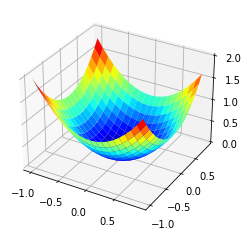

In [4]:
r_min, r_max = -1.0, 1.0

xaxis = arange(r_min, r_max, 0.1)

yaxis = arange(r_min, r_max, 0.1)

x,y = meshgrid(xaxis, yaxis)

results = objective(x,y)

fig, ax = pyplot.subplots(subplot_kw = {"projection": "3d"})

ax.plot_surface(x,y, results, cmap = 'jet')

pyplot.show() 

In [5]:
n_iterations = 100

alpha = 0.02

beta1 = 0.8

beta2 = 0.99

eps = 1.0E-08


def adam(bounds, objective, n_iterations, alpha, beta1, beta2, eps):

    solution = bounds[:,0] + rand(len(bounds))*(bounds[:,1] - bounds[:,0])
                       
    solution_eval = objective(solution[0] , solution[1])

    m = []
    
    solutions = []

    for _ in range(bounds.shape[0]):
        m.append(0.0)

    v = []

    for _ in range(bounds.shape[0]):
        v.append(0.0) 

    for it in range(n_iterations):

        g   = derivative(solution[0], solution[1])
        
        new_solution = []
                       
        for i in range(solution.shape[0]):
            
            m[i] = beta1 * m[i] + (1.0 - beta1)*g[i]

            v[i] = beta2 * v[i] + (1.0 - beta2)*g[i]**2.0

            mhat = m[i]/(1.0 - beta1**(it+1))

            vhat = v[i]/(1.0 - beta2**(it+1))
            
            value =  solution[i] - alpha *mhat/(sqrt(vhat) + eps)
            
            new_solution.append(value)
                      
        solution = np.asarray(new_solution)   
     
        solution_eval = objective(solution[0], solution[1])   

        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
        
        solutions.append(solution.copy())
             
    return [solution, solution_eval , solutions]

In [7]:
bounds = np.asarray([[-1.0,1.0], [-1.0, 1.0]])

In [8]:
best, score , solutions = adam(bounds, objective, n_iterations, alpha, beta1, beta2, eps)
print('f(%s) = %.5f' %(best, score))

>0 f([-0.53601366  0.72146461]) = 0.80782
>1 f([-0.51605587  0.70149549]) = 0.75841
>2 f([-0.49617009  0.68157862]) = 0.71073
>3 f([-0.47638703  0.66173573]) = 0.66484
>4 f([-0.45673803  0.64198865]) = 0.62076
>5 f([-0.43725475  0.62235915]) = 0.57852
>6 f([-0.41796886  0.60286869]) = 0.53815
>7 f([-0.39891183  0.5835383 ]) = 0.49965
>8 f([-0.38011458  0.56438838]) = 0.46302
>9 f([-0.36160729  0.54543859]) = 0.42826
>10 f([-0.34341915  0.5267077 ]) = 0.39536
>11 f([-0.32557821  0.50821358]) = 0.36428
>12 f([-0.30811113  0.48997308]) = 0.33501
>13 f([-0.29104312  0.472002  ]) = 0.30749
>14 f([-0.27439775  0.45431508]) = 0.28170
>15 f([-0.25819688  0.43692601]) = 0.25757
>16 f([-0.24246055  0.41984739]) = 0.23506
>17 f([-0.22720694  0.4030908 ]) = 0.21411
>18 f([-0.21245226  0.38666681]) = 0.19465
>19 f([-0.19821077  0.37058499]) = 0.17662
>20 f([-0.18449467  0.35485396]) = 0.15996
>21 f([-0.17131414  0.33948144]) = 0.14460
>22 f([-0.15867727  0.32447426]) = 0.13046
>23 f([-0.14659009  0

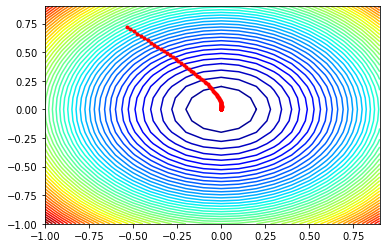

In [9]:
bounds = np.asarray([[-1.0,1.0], [-1.0, 1.0]])

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)

yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

x,y = meshgrid(xaxis, yaxis)

results = objective(x,y)

pyplot.contour(x ,y, results, 50, alpha = 1.0, cmap = 'jet')

solutions = np.asarray(solutions)

pyplot.plot(solutions[:,0], solutions[:,1], '.-', color = 'r')

pyplot.show()   

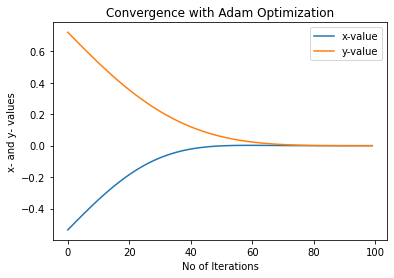

In [10]:
pyplot.plot(solutions[:,0], label='x-value')

pyplot.plot(solutions[:,1],  label='y-value')

pyplot.title('Convergence with Adam Optimization')
pyplot.xlabel('No of Iterations')
pyplot.ylabel('x- and y- values')

pyplot.legend()

pyplot.show()